# Сборный проект - Анализ игровой индустрии

**Описание проекта**


Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**<br>
Name — название игры<br>
Platform — платформа<br>
Year_of_Release — год выпуска<br>
Genre — жанр игры<br>
NA_sales — продажи в Северной Америке (миллионы проданных копий)<br>
EU_sales — продажи в Европе (миллионы проданных копий)<br>
JP_sales — продажи в Японии (миллионы проданных копий)<br>
Other_sales — продажи в других странах (миллионы проданных копий)<br>
Critic_Score — оценка критиков (максимум 100)<br>
User_Score — оценка пользователей (максимум 10)<br>
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br>


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

Привет! Ошибаться это нормально. Ненормально записаться на курсы и не работать. Так что все ок ) 
</div>

# Шаг 1. Откроем файл с данными и изучим общую информацию


In [1]:
# импортирую необходимые библиотеки
# импортируем библиотеки
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


В первых 10 строках уже немало пропусков - не очень хороший знак.
Посмотрим общую информацию о датафрейме:

In [4]:
# общая информация о датафрейме
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



Пропуски:<br>
• Name — название игры<br>
• Year_of_Release — год выпуска<br>
• Genre — жанр игры<br>
• Critic_Score — оценка критиков (максимум 100)<br>
• User_Score — оценка пользователей (максимум 10)<br>
• Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).<br>

Тип данных: столбец - нужный тип<br>
• Year_of_Release — int64<br>
• Critic_Score — int64<br>
• User_Score — float64<br>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

info() - получено первичное представление о данных. 
</div>


#  Шаг 2. Подготовим данные

**Для удобства работы приведем названия столбцов к нижнему регистру:**

In [5]:
games.columns = games.columns.str.lower()

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Использование .lower предпочтительно, так мы автоматизируем работу, впереди у нас датасеты с сотнями столбцами которые нам нужно будет переделывать. Молодец
</div>



In [6]:
#проверка
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Обработка пропусков

**Изменение типа данных по столбцу user_score.**<br>
Посмотрим отдельно столбцы user_score - его формат 'object, что очень странно, ведь если бы там были только числа и NaN'ы, то формат был бы 'float':

In [7]:
#посмотрим сколько всего пропусков в каждом столбце в %
(games.isna().sum()/len(games['platform']))*100

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

👍
</div>

Помимо пропусков, видим "tbd". Посмотрим, сколько их там таких:

In [8]:
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


2500 строк с таким значением.

Почитав FAQ Metacritic'a, найдем, что это аббревиатура от To Be Determined. Пишется тогда, когда игра имеет недостаточное количество отзывов (менее 4) для подсчета рейтинга пользователей и его публикации.
Предполагаю, что с таким можно столкнуться, когда анализируешь или малопопулярные игры, или игры, имеющие приоисхождение и, соответственно, аудиторию, большая часть игроков которых не разговаривает по-английски и не оставляет свои отзывы на таких мировых сайтах как Metacritic. Как пример можно привести японские игры и их аудитораю - вряд ли много японских игроков заходят на Metacritic, чтобы написать отзыв на языке, которым они практически не владеют. Они оценивают свои игры на популярных у себя ресурсах.

Но числовой тип столбца нам необходим. Т.к. 'tbd' фактически и является NaN, заменим и NaN, и 'tbd' на значение -1 и приведем значение столбца к числовому:

In [9]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 Погуглил, разобрался, сделал верной действие.
</div>


У нас к обработке столбцы critic_score и user_score - заполним пропуски значением -1.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

Принято )
</div>

In [10]:
print('Количество пропусков в столбце critic_score - {}'.format(games['critic_score'].isnull().sum()))
print('Количество пропусков в столбце user_score - {}'.format(games['user_score'].isnull().sum()))

Количество пропусков в столбце critic_score - 8578
Количество пропусков в столбце user_score - 9125


**Отдельный столбец с суммой продаж по всем регионам 'sales_total':**

In [11]:
games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Length: 16715, dtype: float64

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

👍 если что то понравилось, лучше сразу попробовать.
</div>

In [12]:
#проверка взаимосвязи пропусков 2-х столбцов (одинаковое конилл-во пропусков)
games[(games['name'].isnull()) & (games['genre'].isnull())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
# удалим эти 2 строки: их отсутствие не исказят наши данные
games = games.dropna(subset=['name'])

In [14]:
# проверка
games.query('genre.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [15]:
unik_years = games['year_of_release'].unique()
unik_years

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [16]:
# удалим пропуски. их всего -1.5%, поэтому удаление их не исказят наш результат
games.dropna(subset = ['year_of_release'], inplace = True) 


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Обоснование и решение удалить year_of_release, genre и name верное. Методы применены оптимально. Молодец

</div>

In [17]:
# заполняем пропуск на значение "undefined"
games['rating'] = games['rating'].fillna('undefined')

In [18]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Раздел выполнен без ошибкой
</div>

## Добавление отдельного столбца ('sum_sales' - суммарные продажи во всех регионах)

In [19]:
games['sum_sales']= games.na_sales+games.eu_sales+games.jp_sales+games.other_sales
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 еще разок )
</div>

## Замена типа данных

In [20]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


In [21]:
#меняем типы данных
games['year_of_release'] = games['year_of_release'].astype('int')
games['user_score'] = games['user_score'].astype('float64')

In [22]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [23]:
# проверим наличие дубликатов
games.duplicated().sum()

0

In [24]:
games.loc[games['rating']=='K-A', 'rating'] = 'E'

In [25]:
games.rating.isna().sum()/games.shape[0]*100

0.0

In [26]:
games.rating.fillna('Unknown', inplace = True)

In [27]:
games.rating.isna().sum()

0

Вывод:<br>
Привели нашу таблицу в порядок:<br>

Привели название столбцов к нижнему регистру.<br>
Избавились от пропусков: удалили в столбцах - там где их очень мало; заменили на маркеры для удобства замены типа данных, но удалять их было нельзя, т.к. это испортит нашу статистику.<br>
Добавили отдельный столбец 'sum_sales'.<br>
Заменили тип данных.<br>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

👍 здорово что не поленился )
</div>

# Шаг 3. Проведем исследовательский анализ данных

### Cколько игр выпускалось в разные годы? Важны ли данные за все периоды?

Text(0, 0.5, 'Количество игр, млн. проданных копий')

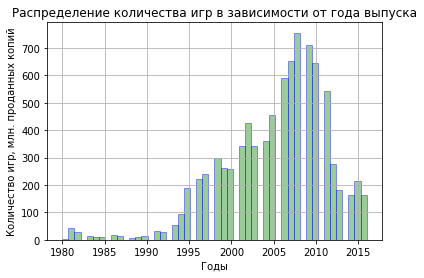

In [28]:
# создадим сводную таблицу по названию игры и году выпуска
years_of_name=games.pivot_table(index='name', values='year_of_release', aggfunc='sum')
# построим гисторграмму по сводной таблице
years_of_name.hist(bins=50, range=(1980,2016), ec='blue', alpha = 0.4, color='green')
plt.title('Распределение количества игр в зависимости от года выпуска')
plt.xlabel('Годы')
plt.ylabel('Количество игр, млн. проданных копий')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


    
Твой первый график график оформлен хорошо, подобраны параметры, заголовок, надписи по осям не забыты ) 

Почему это может быть важно? Графики первое что бросается в глаза, а первое впечатление порой определяющее.
</div>


    




Вывод:<br>
Начинается наш период с 1980 года. До 1995 года продавались тяжело игры, больше 100 млн. игр не продавалось. После 1995 года наблюдается постепенный рост продаж. Примерно с 2008 года, где было проданно около 760 млн.проданных копий, наблюдается уже спад. И в 2015 "докатились" до продаж порядка 200 млн.шт.

### Как менялись продажи по платформам? Выбор платформ с наибольшими суммарными продажами и построение распределения по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [29]:
# создадим сводную таблицу по нужным столбцам таблицы
platform_pivot=games.pivot_table('sum_sales', 
                index = 'platform', 
                aggfunc = 'sum').sort_values(by = 'sum_sales', ascending = False).head(20)
platform_pivot

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


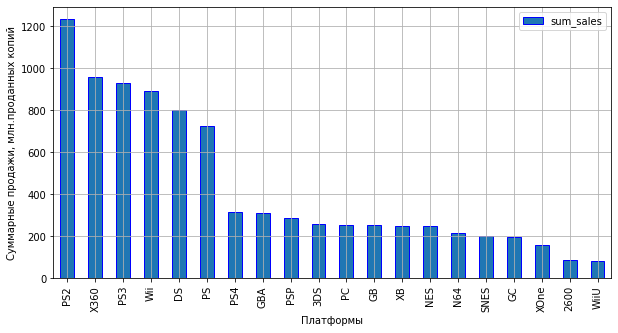

In [30]:
# нарисуем столбчатую диаграмму
platform_pivot.plot(kind='bar',figsize=(10, 5), grid=True, ec='blue')
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Платформы')
plt.show()

In [31]:
# выберем первые 6 лидеров, т.к. затем значения сильно упали почти в 2 раза
platform_best=platform_pivot.head(6)
platform_best

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


In [32]:
# создадим список лучших платформ
platform_best6 =platform_pivot.head(6).index.to_list()

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

Конечно. Зачем мы программируем? Как раз чтобы освободить себя от ручной работы 
</div>

In [33]:
# сделаем сводную таблицу с лучшими платфорами
platform_best6_pivot=games.query('platform.isin(@platform_best6)').pivot_table(index='year_of_release', 
                                                                            columns='platform', 
                                                                            values='sum_sales', 
                                                                            aggfunc='sum')
platform_best6_pivot

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN
1998,NaN,169.49,NaN,NaN,NaN,NaN
1999,NaN,144.53,NaN,NaN,NaN,NaN
2000,NaN,96.37,39.17,NaN,NaN,NaN
2001,NaN,35.59,166.43,NaN,NaN,NaN


<AxesSubplot:xlabel='platform', ylabel='year_of_release'>

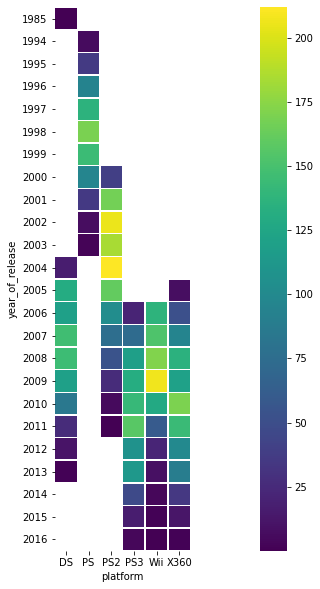

In [34]:
fig, ax = plt.subplots(figsize=(25,10)) 
sns.heatmap(platform_best6_pivot, linewidth=0.5, linecolor='w', square=True,  cmap="viridis", )

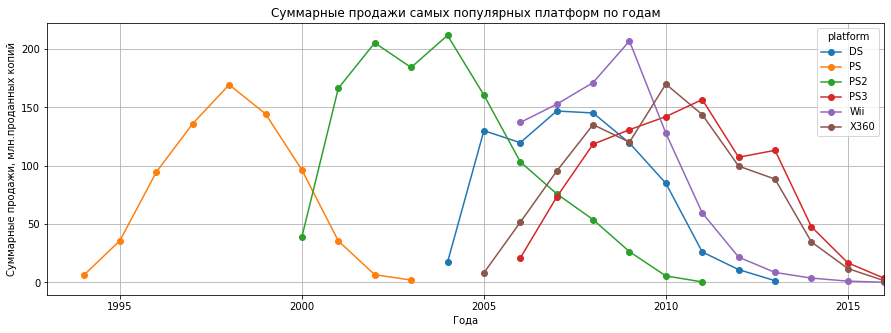

In [35]:
platform_best6_pivot.plot(grid=True, figsize=(15, 5), style ='o-')
plt.xlim(1993, 2016)
plt.title('Суммарные продажи самых популярных платформ по годам')
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Года')
plt.show()

Вывод:<br>
По графику видим, что платформа появляется и исчезает, примерный жизненный цикл одной игры - 10 лет. Видимо, это связано с выпуском новой игры, т.е. появилась новая игра и спрос на старую постепенно падает. Это хорошо видно на старте продаж PS4 \ XOne, когда продажи X360 \ PS3 начинают падать, т.е. нам достаточно взять период с 2013-14 года. Но...

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Информативный график, и вывод верный. 

Как можно было еще? Например построить heatmap, или сделать сводную табличку и посчитать средний жизненный цикл.
</div>


sns.heatmap(data_plat, linewidth=0.5, linecolor='w', square=True,  cmap="viridis")


### Данные за соответствующий актуальный период. Определение актуального периода.

In [36]:
yers_after2005 = games.query('2012<year_of_release')


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Для правильного выбора нужно было увязать требование проекта - прогноз на 2017 года, данные о жизненном цикле платформ, особенность индустрии игры, и учета тренда. Твой выбор верный, молодец.

</div>

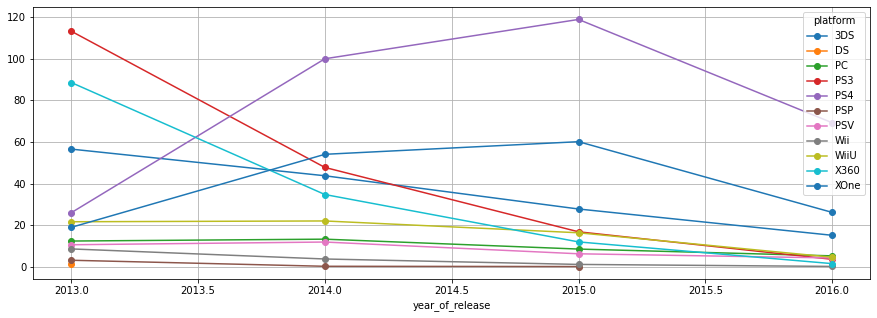

In [37]:
yers_after2005.pivot_table(index='year_of_release', 
                           columns='platform', 
                           values='sum_sales', 
                           aggfunc='sum').plot(grid=True, figsize=(15, 5), style ='o-')
plt.show()

Вывод:<br>
Наблюдается медленный спад актуальности платформ. Но есть хорошие новости: рост 2 платформ - PS4 и XOne.

### Какие платформы лидируют по продажам, растут или падают? Выбор нескольких потенциально прибыльных платформ.

In [38]:
platform_best10=platform_pivot.head(10).index.to_list()

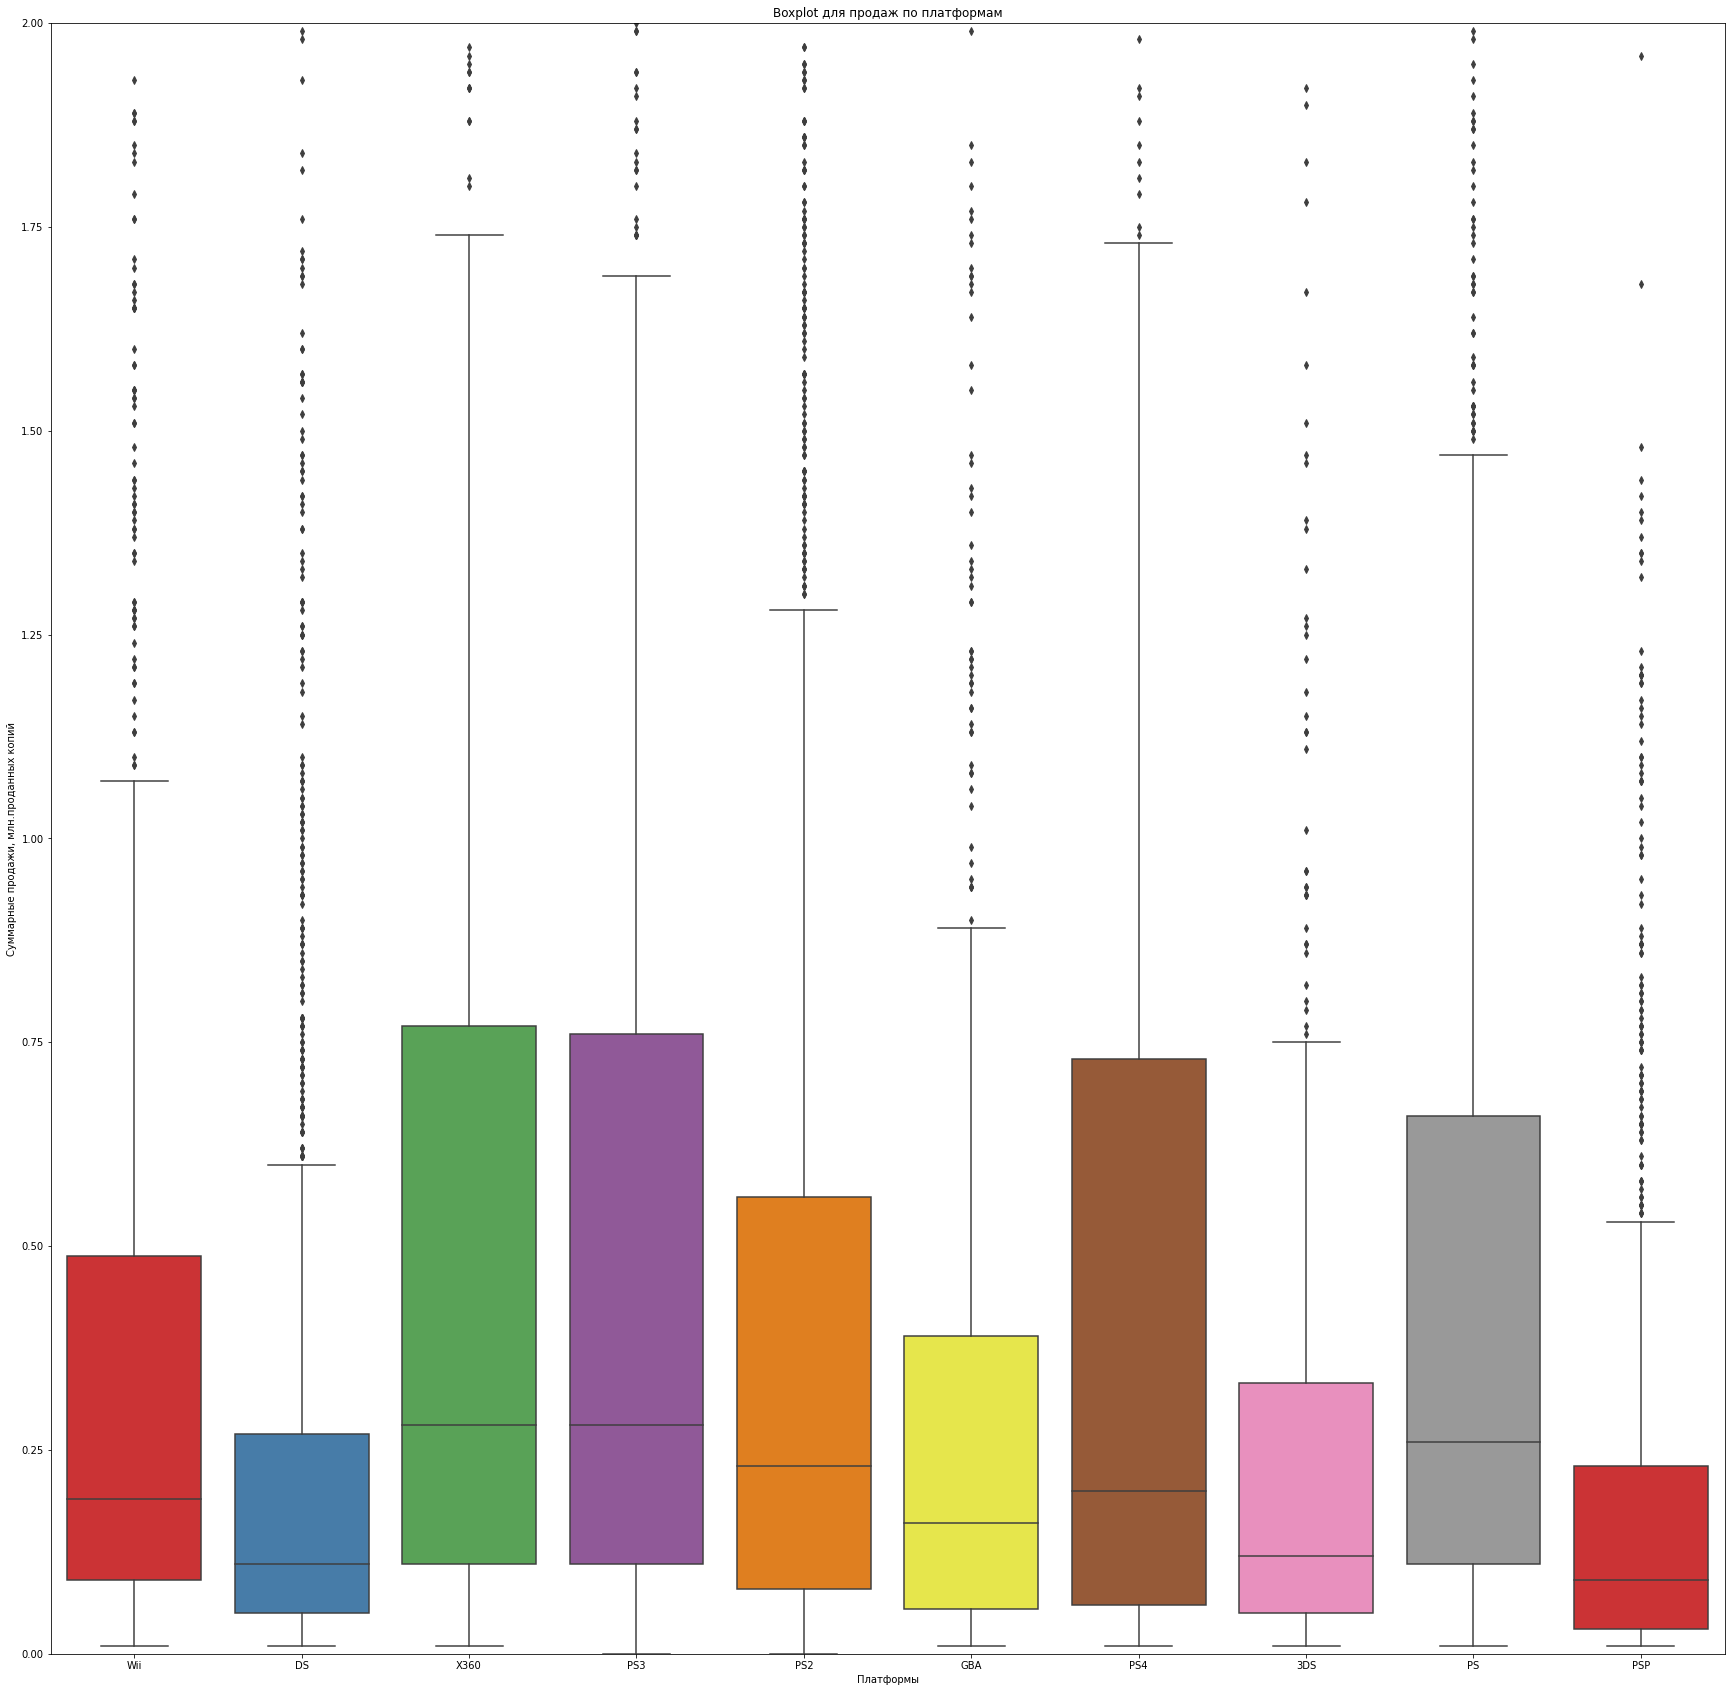

In [39]:
# построим ящик с усами для 10 лидеров платформ
plt.figure(figsize=(30,30))
box_all = sns.boxplot(x="platform", y="sum_sales", data=games.query('platform.isin(@platform_best10)'), palette="Set1")
box_all.set(ylim=(0,2))
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Платформы')
plt.title('Boxplot для продаж по платформам')
plt.show()

Сложно мне тут сделать вывод.<br>
Совсем по-другому представлял "ящик с усами" PS2 -лидера. Представлялось, что ящик будет выше, или усы длиннее, или медиана выше. По этому графику,мне кажется, что лидеры X360 и PS4.

In [40]:
platform_best10_pivot=games.query('platform.isin(@platform_best10)').pivot_table(index='year_of_release', 
                                                                            columns='platform', 
                                                                            values='sum_sales', 
                                                                            aggfunc='sum')
platform_best10_pivot

platform,3DS,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,NaN,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,144.53,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,0.07,96.37,39.17,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,61.53,35.59,166.43,NaN,NaN,NaN,NaN,NaN


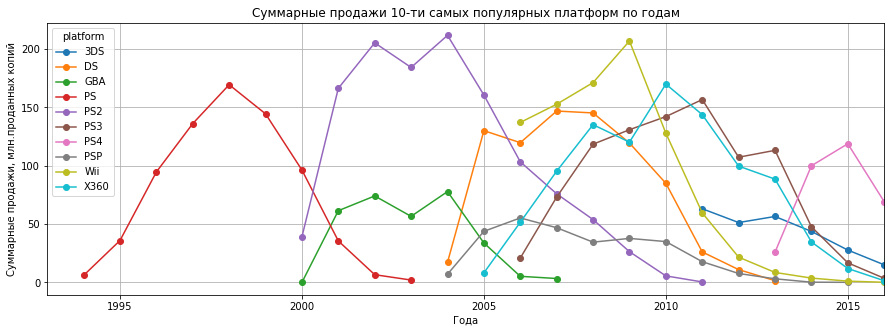

In [41]:
platform_best10_pivot.plot(grid=True, figsize=(15, 5), style ='o-')
plt.xlim(1993, 2016)
plt.title('Суммарные продажи 10-ти самых популярных платформ по годам')
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Года')
plt.show()

Вывод:<br>
Самая первая игра PS выпустилась в 1993 году, была на пике своей популярности в 98 году, и после выхода в 2000 году новых игр PS2 и GBA выдохлась к 2003 году, PS2 и GBA ждала та же участь- всё было ничего , особенно у PS2, пока не вышла "молодежь"- DS, Wii,X360, PS3 и самая менее популярная из этого списка PSP. В 2013 году вышла новая игра - PS4, которая отняла всё внимание игроманов и уже в 2015 году ей не было равных. Но можем предположить, что и её популярность будет падать.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Посмотрел на продажи, на динамику и нашел платформы которые действительно стоит рассмотреть для 2017 года. 
    
    
</div>

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам.

У нас на 2016 год наиболее хорошо держатся на рынке PS4 \ XOne и портативная 3DS. Определим продажи по этим платформам как глобальные, чтобы примерно понять, как же продаются игры на наиболее свежих и перспективных платформах

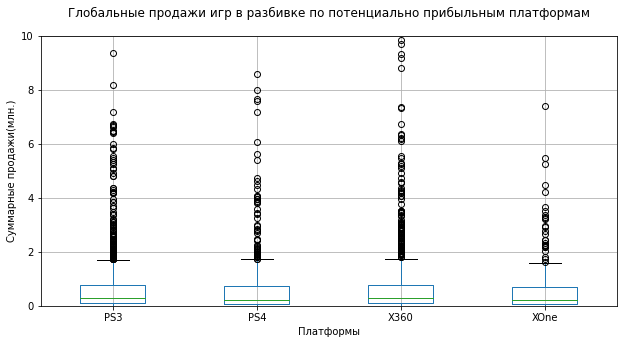

In [42]:
platform_best3=['PS4','XOne','PS3','X360']
report=games.query('platform in @platform_best3')
report.boxplot('sum_sales','platform', figsize=(10,5))
plt.suptitle('Глобальные продажи игр в разбивке по потенциально прибыльным платформам')
plt.title(None)
plt.xlabel('Платформы'),plt.ylabel('Суммарные продажи(млн.)')
plt.ylim(0, 10)
plt.show()

Вывод:<br>
График позволяет наглядно увидеть основные характеристики данных( таких как медиана, нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы).

На построенном графике видно примерно одинаковые значения основных характеристик у платформ попарно PS3 и XOne, PS4 и X360. То есть игры для старой версии серии платформ PS = PS3 имеет примерно теже продажи, что у новой версии платформ XBOX = XOne и аналогично наоборот.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?Диаграмма рассеяния и посчитайте корреляцию между отзывами и продажами.


In [43]:
platform_best_user = games[games['platform'] == "PS4"]

Text(0.5, 1.0, 'Зависимость отзывов критиков на продажи игр на платформе PS4')

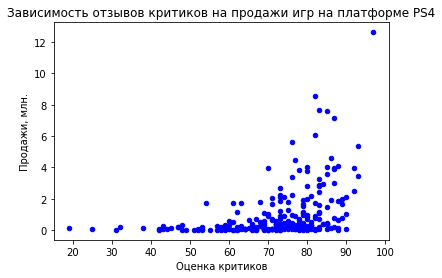

In [44]:
#Возьмем  платформу PS4 зависимость отзывов критиков
platform_best_user.plot(x = 'critic_score', y = 'sum_sales', kind = 'scatter', color='blue')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, млн.')
plt.title('Зависимость отзывов критиков на продажи игр на платформе PS4')

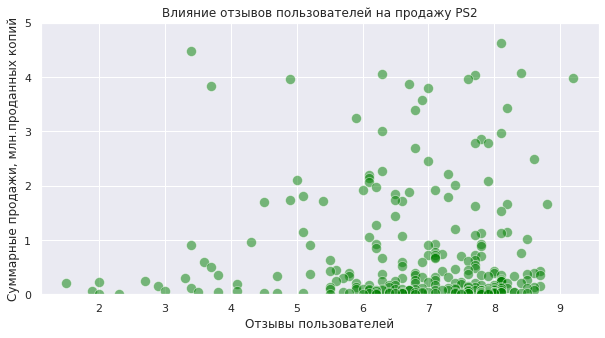

In [45]:
sns.set(rc={'figure.figsize':(10,5)}) #задаем размер графика
ax = sns.scatterplot(x="user_score", y="sum_sales", data= platform_best_user, 
                     alpha=0.5, color='green', s = 100)
ax.set(ylim=(0,5))
plt.ylabel('Суммарные продажи, млн.проданных копий')
plt.xlabel('Отзывы пользователей')
plt.title('Влияние отзывов пользователей на продажy PS2')
plt.show()

In [46]:
print('Коэффициент корреляции', report['sum_sales'].corr(report['critic_score']))

Коэффициент корреляции 0.4041797124498455


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 sns.scatterplot
    
    
Здорово что заметил нелинейные связи на графике.     
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

Нет человека...эээ..нет заглушки нет проблем )
</div>

In [47]:
platform_best_user = games[games['platform'] == "PS4"]

Text(0.5, 1.0, 'Зависимость отзывов пользователей на продажи игр на платформе PS4')

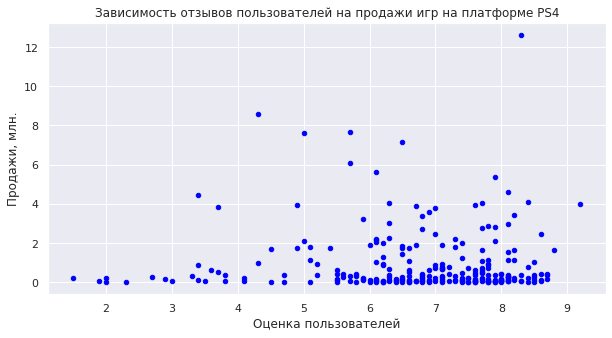

In [48]:
#Возьмем  платформу PS4 зависимость отзывов пользователей
platform_best_user.plot(x = 'user_score', y = 'sum_sales', kind = 'scatter', color='blue')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, млн.')
plt.title('Зависимость отзывов пользователей на продажи игр на платформе PS4')

In [49]:
print('Коэффициент корреляции', report['sum_sales'].corr(report['user_score']))

Коэффициент корреляции 0.09494125861978714


Вывод:<br>
Корреляция в 0.4 говорит о том, что связь минимальна, т.е её почти нет, в то время как влияние отзывов пользователей на продажи практически нет(коэфф равен 0.09)

In [50]:
platform_best_user = games[games['platform'] == "XOne"]

Text(0.5, 1.0, 'Зависимость отзывов критиков на продажи игр на платформе XOne')

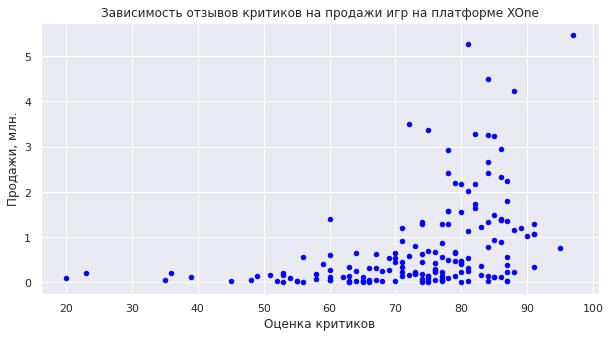

In [51]:
#Возьмем  платформу XOne  зависимость отзывов критиков
platform_best_user.plot(x = 'critic_score', y = 'sum_sales', kind = 'scatter', color='blue')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, млн.')
plt.title('Зависимость отзывов критиков на продажи игр на платформе XOne')

In [52]:
platform_best_user = games[games['platform'] == "XOne"]

Text(0.5, 1.0, 'Зависимость отзывов пользователей на продажи игр на платформе XOne')

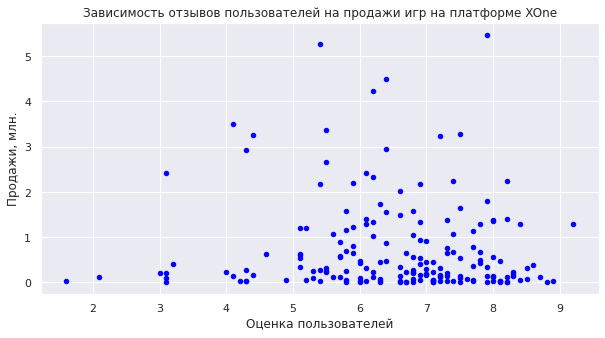

In [53]:
#Возьмем  платформу XOne  зависимость отзывов пользователей
platform_best_user.plot(x = 'user_score', y = 'sum_sales', kind = 'scatter', color='blue')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, млн.')
plt.title('Зависимость отзывов пользователей на продажи игр на платформе XOne')

In [54]:
platform_best_user = games[games['platform'] == "PS2"]

Text(0.5, 1.0, 'Зависимость отзывов критиков на продажи игр на платформе PS2')

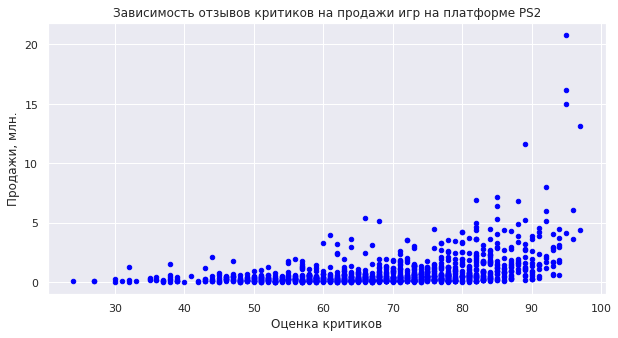

In [55]:
#Возьмем  платформу PS2 
platform_best_user.plot(x = 'critic_score', y = 'sum_sales', kind = 'scatter', color='blue')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, млн.')
plt.title('Зависимость отзывов критиков на продажи игр на платформе PS2')

In [56]:
platform_best_user = games[games['platform'] == "PS2"]

Text(0.5, 1.0, 'Зависимость отзывов пользователей на продажи игр на платформе PS2')

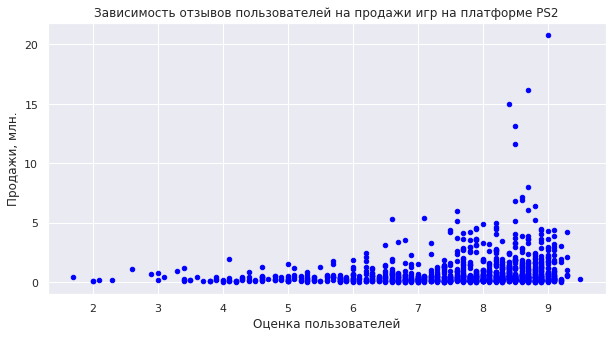

In [57]:
#Возьмем  платформу PS2 
platform_best_user.plot(x = 'user_score', y = 'sum_sales', kind = 'scatter', color='blue')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, млн.')
plt.title('Зависимость отзывов пользователей на продажи игр на платформе PS2')

In [58]:
platform_best_user = games[games['platform'] == "X360"]

Text(0.5, 1.0, 'Зависимость отзывов пользователей на продажи игр на платформе X360')

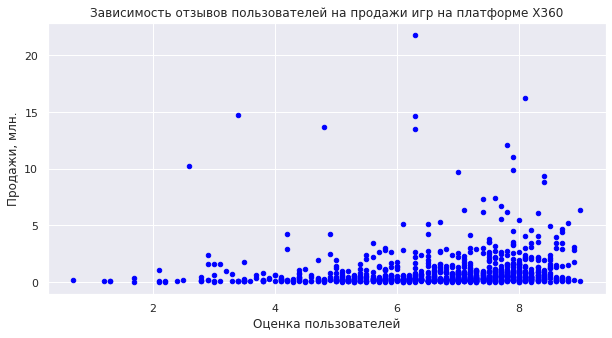

In [59]:
#Возьмем  платформу X360 
platform_best_user.plot(x = 'user_score', y = 'sum_sales', kind = 'scatter', color='blue')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, млн.')
plt.title('Зависимость отзывов пользователей на продажи игр на платформе X360')

In [60]:
platform_best_user = games[games['platform'] == "X360"]

Text(0.5, 1.0, 'Зависимость отзывов критиков на продажи игр на платформе X360')

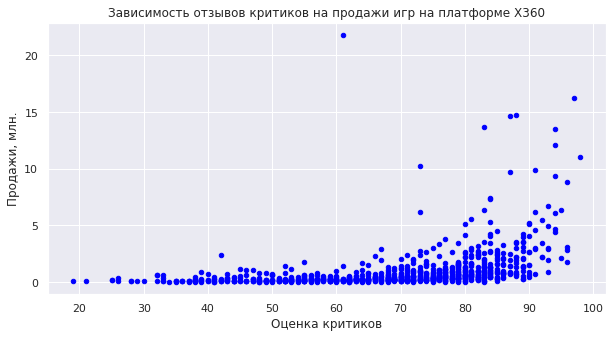

In [61]:
#Возьмем  платформу X360 
platform_best_user.plot(x = 'critic_score', y = 'sum_sales', kind = 'scatter', color='blue')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, млн.')
plt.title('Зависимость отзывов критиков на продажи игр на платформе X360')

In [62]:
platform_best_user = games[games['platform'] == "PS3"]

Text(0.5, 1.0, 'Зависимость отзывов критиков на продажи игр на платформе PS3')

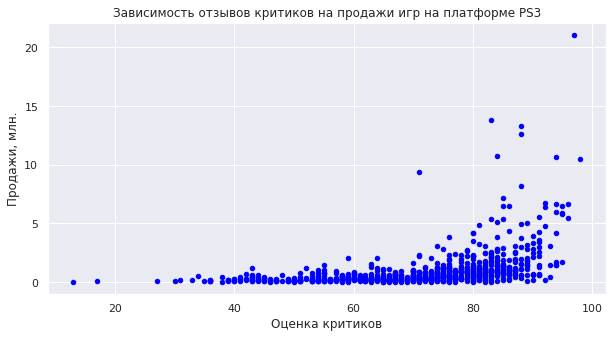

In [63]:
#Возьмем  платформу PS3 
platform_best_user.plot(x = 'critic_score', y = 'sum_sales', kind = 'scatter', color='blue')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, млн.')
plt.title('Зависимость отзывов критиков на продажи игр на платформе PS3')

Text(0.5, 1.0, 'Зависимость отзывов пользователей на продажи игр на платформе PS3')

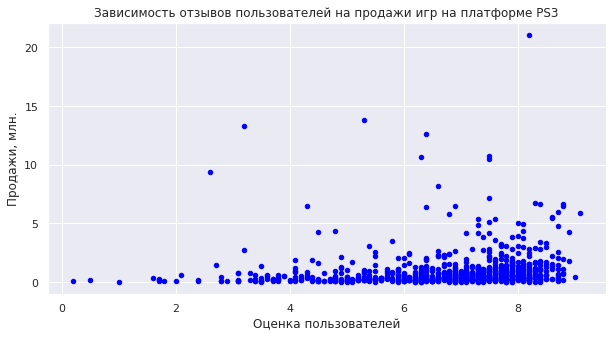

In [64]:
#Возьмем  платформу PS3 
platform_best_user.plot(x = 'user_score', y = 'sum_sales', kind = 'scatter', color='blue')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, млн.')
plt.title('Зависимость отзывов пользователей на продажи игр на платформе PS3')

In [65]:
for plt in['PS3', 'X360', 'PS2', 'PS', 'XOne']:
    platf = games.query('platform == @plt and (user_score != -1) and (critic_score != -1)')
    crr = round(platf['critic_score'].corr(platf['user_score']), 2)
    print('Корреляция оценок критиков к продажам', plt, crr)
for plt in['PS3', 'X360', 'PS2', 'PS', 'XOne']:
    platf = games.query('platform == @plt and (user_score != -1) and (critic_score != -1)')
    crr = round(platf['critic_score'].corr(platf['user_score']), 2)
    print('Корреляция оценок подльзователей к продажам', plt, crr)

Корреляция оценок критиков к продажам PS3 0.63
Корреляция оценок критиков к продажам X360 0.63
Корреляция оценок критиков к продажам PS2 0.57
Корреляция оценок критиков к продажам PS 0.69
Корреляция оценок критиков к продажам XOne 0.47
Корреляция оценок подльзователей к продажам PS3 0.63
Корреляция оценок подльзователей к продажам X360 0.63
Корреляция оценок подльзователей к продажам PS2 0.57
Корреляция оценок подльзователей к продажам PS 0.69
Корреляция оценок подльзователей к продажам XOne 0.47


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

👍 Принято.
    
    
И сразу совет - используй цикл, тут он очень в тему, код сократится в несоклько раз. Облегчай себе работу, и тем коллегам кто будет с ним работать     
</div>

### Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [66]:
games.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24


In [67]:
games['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

In [68]:
df_genre_reting = (games.groupby(['genre']).agg({'sum_sales':'sum', 'name':'count'})
                   .sort_values(by='sum_sales', ascending=False))
                   
#.sort_values(by='total_sales', ascending=False)
df_genre_reting = df_genre_reting.rename(columns={'name':'name_count'})
df_genre_reting = df_genre_reting.reset_index()
#df_genre_reting = df_genre_reting.sort_values(by='count', ascending=False)
display(df_genre_reting)
#.plot(kind='hist', bins=20, y='genre', figsize=(16,10));

,genre,sum_sales,name_count
0,Action,1716.52,3307
1,Sports,1309.67,2306
2,Shooter,1041.36,1296
3,Role-Playing,931.08,1481
4,Platform,825.55,878
5,Misc,790.29,1721
6,Racing,723.49,1226
7,Fighting,442.66,837
8,Simulation,387.96,857
9,Puzzle,239.89,569


In [69]:
#добавим столбец сколько один релиз каждого жанра продавался

df_genre_reting['sum_sales_millon'] = (df_genre_reting['sum_sales']*7)//1
df_genre_reting['sum_sales_millon2'] = (df_genre_reting['sum_sales']*1000000)//1
df_genre_reting['profit_one_box'] = (df_genre_reting['sum_sales_millon2']/df_genre_reting['name_count'])//1
display(df_genre_reting.head(6))

,genre,sum_sales,name_count,sum_sales_millon,sum_sales_millon2,profit_one_box
0,Action,1716.52,3307,12015.0,1.716520e+09,519056.0
1,Sports,1309.67,2306,9167.0,1.309670e+09,567940.0
2,Shooter,1041.36,1296,7289.0,1.041360e+09,803518.0
3,Role-Playing,931.08,1481,6517.0,9.310800e+08,628683.0
4,Platform,825.55,878,5778.0,8.255500e+08,940261.0
5,Misc,790.29,1721,5532.0,7.902900e+08,459203.0


Вывод:<br>
- Жанры которые более просты в освоеннии пользователями продаются лучше action, sports, shooter в отличие от adventure, strategy
- Так же из графика 'Сколько раз продалась каждая копия игры' видно что есть жанры которые в рассчете на количество на одну копию опережают общих лидеров продаж, но это скорее важно для производителей игр, в какой области начинать разработку игры чтобы получить максимальную прибыль на копию из нашего графика мы видим что наиболее выгодно разрабатывать платформеры (Марио рулит на все времена :)))

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

Виктор, ты посчитал сумму, потом колличество, потом сделал табличку в которой поделил первое на второе. Так? 
    
А почему просто не использовал  .agg({'sum_sales':'mean'})  ?   
</div>

# Шаг 4. Составим портрет пользователя каждого региона

## Самые популярные платформы (топ-5). Описание различий в долях продаж.

In [70]:
# создадим список регионов
regions = ['na_sales','eu_sales','jp_sales']
games_since2012=games.query('year_of_release >= 2012')

In [71]:
# посмотрим для себя где и как продается всё
print("Суммарные продажи, млн.проданных копий в регионе")
for reg in regions:
    sum_region=games_since2012[reg].sum()     
    print(reg, round(sum_region))

Суммарные продажи, млн.проданных копий в регионе
na_sales 591
eu_sales 507
jp_sales 193


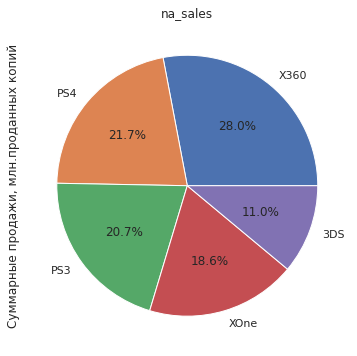

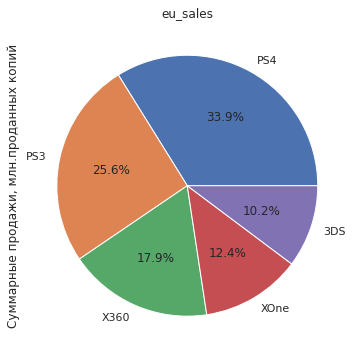

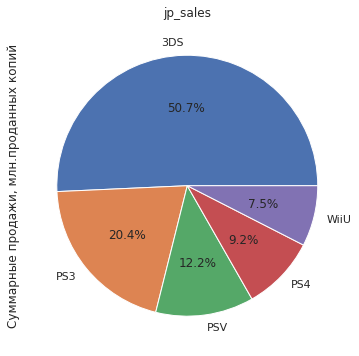

In [72]:
# создадим цикл для быстрого вывода для каждого региона
for reg in regions:
    (games_since2012.pivot_table(index='platform', values=reg, aggfunc='sum')
                .sort_values(reg, ascending=False).head(5)
                .plot(kind='pie', y=reg, figsize=(6, 6), legend=False, title = reg, autopct='%1.1f%%')
                .set(ylabel='Суммарные продажи, млн.проданных копий')
    )
   

Вывод:<br>
У жителей данных регионов разные предпочтения в выборе платформ. Самая популярная в Северной Америке - X360, В Европе - PS4, в Японии c существенным отрывом- 3DS.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 использовал цикл, очень аккуратный график
</div>

### Самые популярные жанры (топ-5). Поясните разницу.

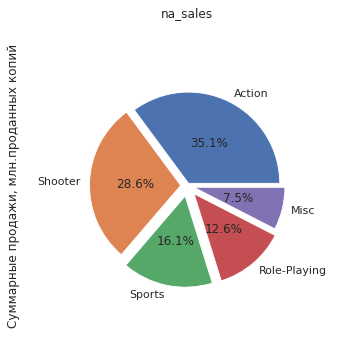

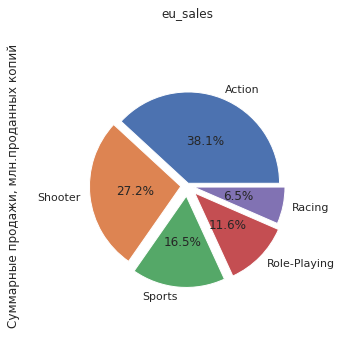

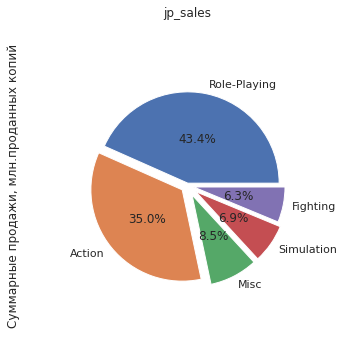

In [73]:
for reg in regions:
    (games_since2012.pivot_table(index='genre', values=reg, aggfunc='sum')
                .sort_values(reg, ascending=False).head(5)
                .plot(kind='pie', y=reg, figsize=(6, 6), legend=False, pctdistance=0.5, 
                      labeldistance=1.1, radius=0.7, title = reg, autopct='%1.1f%%', explode = [0.02, 0.05, 0.08, 0.08, 0.05])
                .set(ylabel='Суммарные продажи, млн.проданных копий')
    )
   

Вывод:<br>
Самый популярный жанр в Северной Америке и в Европе - Action, а в Японии- Pole-Playing.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Япония на своей волне )
</div>

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [74]:
esrb = games.groupby(['rating']).agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'})
esrb_share = pd.DataFrame()
esrb_share['na_share'] = esrb['na_sales'] / esrb['na_sales'].sum() #доля продаж в na от общих продаж
esrb_share['eu_share'] = esrb['eu_sales'] / esrb['eu_sales'].sum()
esrb_share['jp_share'] = esrb['jp_sales'] / esrb['jp_sales'].sum()
display(esrb.style.background_gradient())
display(esrb_share.style.background_gradient())

,na_sales,eu_sales,jp_sales
rating,,,
AO,1.260000,0.610000,0.000000
E,1276.800000,704.140000,199.420000
E10+,345.500000,183.350000,40.200000
EC,1.530000,0.110000,0.000000
M,742.890000,480.000000,63.580000
RP,0.000000,0.030000,0.000000
T,747.600000,421.790000,150.700000
undefined,1225.840000,609.650000,836.740000


,na_share,eu_share,jp_share
rating,,,
AO,0.000290,0.000254,0.000000
E,0.294097,0.293431,0.154512
E10+,0.079582,0.076406,0.031147
EC,0.000352,0.000046,0.000000
M,0.171117,0.200027,0.049262
RP,0.000000,0.000013,0.000000
T,0.172202,0.175769,0.116764
undefined,0.282359,0.254055,0.648314


In [75]:
#посмотрим уникальные значения
spisok_raiting=games['rating'].unique()
spisok_raiting

array(['E', 'undefined', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [76]:
# создадим новый список с расшифрованными названиями
new_raiting=['Для всех', 'undefined', 'Для взрослых', 'Подросток','Для всех от 10 лет и старше','Для детей – для тех, кто уже научился говорить и держать джойстик','Только для взрослых','Для детей младшего возраста','Рейтинг ожидается']
new_raiting

['Для всех',
 'undefined',
 'Для взрослых',
 'Подросток',
 'Для всех от 10 лет и старше',
 'Для детей – для тех, кто уже научился говорить и держать джойстик',
 'Только для взрослых',
 'Для детей младшего возраста',
 'Рейтинг ожидается']

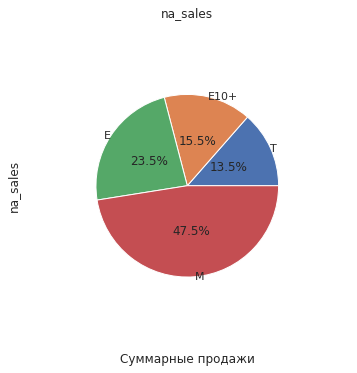

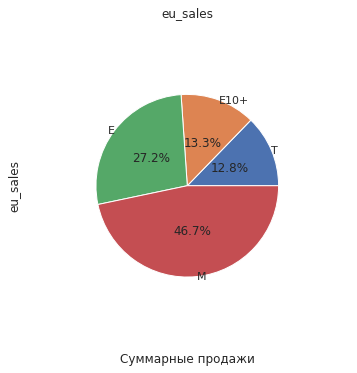

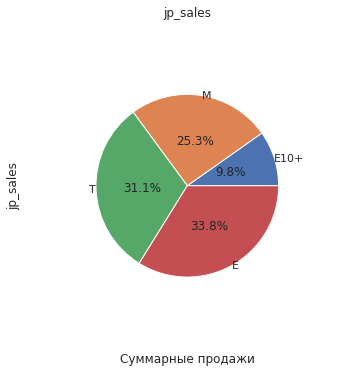

In [77]:
rating_actual= games.query('rating != "undefined" and rating != "Рейтинг ожидается" and year_of_release >= 2012')
for reg in regions:
    (rating_actual.pivot_table(index='rating', values=reg, aggfunc='sum')
                .sort_values(reg, ascending=True).tail(5)
                .plot(kind='pie', y=reg, figsize=(6, 6), legend=False, pctdistance=0.5, 
                      labeldistance=1, radius=0.7, title = reg, autopct='%1.1f%%')
                .set(xlabel='Суммарные продажи')
    )


Вывод:<br>
В Северной Америке и в Европе предпочитают рейтинги "Для взрослых", в Японии "Для всех".

**Вывод:**<br>
Портреты пользователей из каждого региона:<br>

Средне-статистический пользователь из Северной Америки пользуется, в основном, платформами X360 и PS4, предпочитает игровые жанры "Action" и "Shoter" и игры с рейтингом "Для взрослых".<br>

Средне-статистический пользователь из Европы предпочитает платформы PS4 и PS3, жанры "Action" и "Shoter" и игры с рейтингом "Для взрослых".<br>

Средне-статистический пользователь из Японии отдает своё предпочтение платформе 3DS, жанру "Role-Playing" и "Action", рейтингу "Для всех".<br>


# Шаг 5. Проверим гипотезы

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?

In [78]:
#выберем пользовательские рейтинги платформ Xbox One 
user_score_xone= games.query('platform == "XOne" and user_score!="nan" and year_of_release >= 2012') 
#выберем пользовательские рейтинги платформ Xbox One и PC
user_score_pc = games.query('platform == "PC" and user_score!="nan" and year_of_release >= 2012')  

In [79]:
var_xone = np.var(user_score_xone['user_score'])
var_pc= np.var(user_score_pc['user_score'])
print('{:} {: >5.2f} '.format('Дисперсия платформ Xbox One равна:', var_xone))
print('{:} {: >11.2f} '.format('Дисперсия платформ PC равна:', var_pc ))

Дисперсия платформ Xbox One равна:  1.90 
Дисперсия платформ PC равна:        2.76 


Формулировки гипотез:<br>
H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.<br>
H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.<br>

Для проверки гипотезы возьмем стандартное значение alpha = 0.05<br>

In [80]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    user_score_xone['user_score'],
    user_score_pc['user_score'],
    equal_var= False  # так как дисперсии генеральных совокупностей, из которых взяты выборки, не равны
    #equal_var= True # для сравнения результата (что будет когда  True)
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, т.е. средние пользовательские рейтинги платформ Xbox One и PC различаются!")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC одинаковы!")

p-значение: nan
Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC одинаковы!


In [81]:
# сравним средние оценки
print('{:} {: >5.2f} '.format("Средний пользовательский рейтинг платформ Xbox One:", user_score_xone['user_score'].mean() ))
print('{:} {: >11.2f} '.format("Средний пользовательский рейтинг платформ PC:",user_score_pc['user_score'].mean() ))

Средний пользовательский рейтинг платформ Xbox One:  6.52 
Средний пользовательский рейтинг платформ PC:        6.43 


**Вывод:**<br>
Средние пользовательские рейтинги платформ Xbox One и PC статистически одинаковы! Полученное значение p-value говорит о том, что с вероятностью в почти 56 % такое или большее различие можно получить случайно. Это большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами.
Из "ручного" сравнения видно, что cредние пользовательские рейтинги платформ Xbox One и PC действительно очень близки по своим значениям и наша гипотеза подтвердила это.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Правильно сформулирована нулевая и альтернативные гипотезы, правильно выбрана статистика, метод, equal_var=False.


</div>


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Успех:

👍
</div>

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные?

In [82]:
#выберем пользовательские рейтинги жанров Action и Sports
user_score_action= games.query('genre == "Action" and user_score!="nan" and year_of_release >= 2012') 
#выберем пользовательские рейтинги платформ Xbox One и PC
user_score_sports = games.query('genre == "Sports" and user_score!="nan" and year_of_release >= 2012') 

In [83]:
var_action = np.var(user_score_action['user_score'])
var_sports= np.var(user_score_sports['user_score'])
print('{:} {: >5.2f} '.format('Дисперсия жанра Action равна:', var_action))
print('{:} {: >5.2f} '.format('Дисперсия жанра Sports равна:', var_sports))

Дисперсия жанра Action равна:  1.89 
Дисперсия жанра Sports равна:  3.01 


Формулировки гипотез:<br>
H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.<br>
H1: Средние пользовательские рейтинги жанров Action и Sport разные.<br>

Для проверки гипотезы возьмем стандартное значение alpha = 0.05<br>

In [84]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    user_score_action['user_score'],
    user_score_sports['user_score'],
    equal_var= False  # так как дисперсии генеральных совокупностей, из которых взяты выборки, не равны
    #equal_var= True # для сравнения результата (что будет когда  True)
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, т.е. cредние пользовательские рейтинги жанров Action и Sport разные!")
else:
    print("Не получилось отвергнуть нулевую гипотезу, т.е cредние пользовательские рейтинги жанров Action и Sports одинаковые!")

p-значение: nan
Не получилось отвергнуть нулевую гипотезу, т.е cредние пользовательские рейтинги жанров Action и Sports одинаковые!


In [85]:
# сравним средние рейтинги
print('{:} {: >5.2f} '.format("Средний пользовательский рейтинг платформ Xbox One:", user_score_action['user_score'].mean() ))
print('{:} {: >11.2f} '.format("Средний пользовательский рейтинг платформ PC:",user_score_sports['user_score'].mean() ))

Средний пользовательский рейтинг платформ Xbox One:  6.83 
Средний пользовательский рейтинг платформ PC:        5.46 


**Вывод:**<br>
Средние пользовательские рейтинги жанров Action и Sports разные! Вероятность случайно получить такое отличие крайне мала.
Из "ручного" сравнения видно, что cредние пользовательские рейтинги жанров Action и Sports действительно разные и наша гипотеза подтвердила это.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет: 

Формулировки не совсем точные.  

    
Тема проверка гипотез вызывает много вопросов у студентов. Тут главное понять суть. Мне помогло это [видео](https://www.youtube.com/watch?v=SmReaN-Kn-g&ab_channel=%D0%93%D0%BB%D0%B5%D0%B1%D0%9C%D0%B8%D1%85%D0%B0%D0%B9%D0%BB%D0%BE%D0%B2), первые 20 минут о p-value. Я понял суть и дальше все потихоньку раскрутилось.  

    
</div>


# Шаг 6. Общий вывод:
Мы получили данные до 2016 года. Ознакомились с файлом: заметили пропуски и неверные типы данных в некоторых столбцах, обработали файл: изменили названия всех столбцов – привели всё к нижнему регистру, удалили 2 пропуска в столбцах "Name", "Year_of_Release", обнаружили некорректное значение "tbd" в столбце "user_score" заменили на пропуск, заменили пустые значения в столбцах ['user_score'] ,['critic_score'] ,['rating'] на удобное значение «-1» , данный маркер в дальнейшем будем исключать при анализе. Добавили отдельный столбе 'sum_sales' - суммарные продажи во всех регионах. Сделали замену типов данных столбцов на нужный формат.<br>

Провели исследовательский анализ: Начинается наш период с 1980 года. До 1995 года продавались тяжело игры. После 1995 года наблюдается постепенный рост продаж. Примерно с 2008 года наблюдается уже спад. Жизненный цикл одной игры - 10 лет. Видимо, это связано с выпуском новой игры, т.е. появилась новая игра и спрос на старую постепенно падает. Определили актуальный период с 2005 года по 2015 год, т.к. данные за 2016 год могут быть неполными. За этот период наблюдается медленный спад актуальности платформ, и только рост 2 платформ - PS4 и XOne. Выделили 10 самых популярных игр: самая первая игра PS выпустилась в 1993 году, была на пике своей популярности в 98 году, и после выхода в 2000 году новых игр PS2 и GBA выдохлась к 2003 году, PS2 и GBA ждала та же участь- всё было ничего , особенно у PS2, пока не вышла "молодежь"- DS, Wii,X360, PS3 и самая менее популярная из этого списка- PSP. В 2013 году вышла новая игра - PS4, которая отняла всё внимание игроманов и уже в 2015 году ей не было равных. Но можем предположить, что и её популярность будет падать.<br>

Построилиграфик «ящик с усами» по глобальным продажам игр в разбивке по платформам и выявили, что медианные значения суммарных продаж данных платформ сильно не отличаются, 3-ие квартили и максимальные значения платформ X360 и PS3, PS занимают самые высокие позиции по сравнению с остальными платформами, самый большой выброс значений и низкий 3-ий квартиль у платформы DS. В среднем продажи коррелируют больше с оценкой критиков (в случае, когда оценка критиков выше 50), нежели с оценкой пользователей.<br>

Составили портреты пользователей из каждого региона: Средне-статистический пользователь из Северной Америки пользуется, в основном, платформами X360 и PS4, предпочитает игровые жанры "Action" и "Shoter" и игры с рейтингом "Для взрослых".<br>

Средне-статистический пользователь из Европы предпочитает платформы PS4 и PS3, жанры "Action" и "Shoter" и игры с рейтингом "Для взрослых".<br>

Средне-статистический пользователь из Японии отдает своё предпочтение платформе 3DS, жанру "Role-Playing" и "Action", рейтингу "Для всех".<br>

Планируемая кампания на 2017-й:<br>

1.Так как мы заметили, что жизненный цикл игр -10 лет и по графикам, что все игры на данный момент находятся на стадии спада своей популярности. Считаем, что здесь наибольшая вероятность "оживить" продажу можно - платформу PS4 (дата выхода 2013). По свежести дате выхода предыдущие игры X360, PS3 "изжили своё".<br>
2.Предлагаем принять разные стратегии по повышению продаж в регионах в зависимости от актуальных параметров игр, т.е. использовать портреты средне-статистического пользователя каждого региона.<br>
3.Принять важное замечание, что польше половины продаж сделано в Северной Америке.<br>
4.Предлагаем выпустить новую игру, например, PS5 на базе платформы X360 и PS4 c жанром "Action" и "Sports", рейтингом "Для взрослых" и запустить продажу в Северной Америке и Европе. Для Японии выпустить больше игр на платформе 3DS, жанру Role-Playing, рейтингу "Для всех", но при этом использовать рекламные акции о популярных платформах в других регионах для ознакомления. 

Учитывая численность населения данных регионов,можно сделать вывод, что японцы заядлые игроманы!

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Есть и конкретные рекомендации, и описание данных и как ты с ними работал и анализ с объяснением причин. Хороший, по делу, "без воды" вывод. Но после исправления красных комментариев выше, стоит ещё раз пробежать его взглядом. 

Почему это важно? Когда проект захочет посмотреть будущий работодатель, у него может не быть времени на подробный разбор кода. Вероятнее всего он бегло просмотрит код, но захочет изучить результат, который будет в общем выводе. Поэтому стоит обратить на общий вывод особое внимание. 



</div>
